## KNN classification - Supervised classification model

In [40]:
# import modules
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

# sklearn models/preprocessing classes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [41]:
# Import the data - "Data Collection" part
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

In [42]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [43]:
df.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [44]:
# There are three species so it's a multiclass classification issue

In [45]:
# Selecting the model - KNN - I have to define what kind of a data science problem it is and then choose the model accordingly
# You just have to look up the main models used for classifcation issues and test them and compare their performance
# RandomForrest, Logistic Regression, KNN....
# Let's try KNN

In [47]:
# Split the target (Dependant Variable) with the features (Independant Variables)
y = df['species']
X = df[['petal_length', 'petal_width']]

In [50]:
# How do we choose the test_size ? 
# usually you just do 0.8/0.2 split  

In [51]:
# Training the data

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Using the knn class
# With n_neighbors as an hyperparameter
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [ ]:
# Initialize a model 
model = Model(hyperparameter1=, hyperparameter2=,...)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [53]:
# y_test which is the real label of your test data set
# y_pred which is the predicted label by the knn of your test data set

In [55]:
results = pd.DataFrame({"y_predict":y_pred, "y_test":y_test})

In [57]:
results.head()

,y_predict,y_test
95,versicolor,versicolor
53,versicolor,versicolor
100,virginica,virginica
139,virginica,virginica
7,setosa,setosa


In [59]:
results.shape

(38, 2)

In [63]:
# I want to know if the value in y_predict is the same than the value in y_test
(results['y_predict'] == results['y_test']).mean()

1.0

## Implement k-Means clustering - Unsupervised model

### Preparation: Generate data to use for testing k-means clustering

In [64]:
# The problem

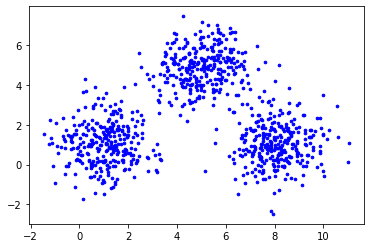

In [83]:
# generate random data 
gt_1 = np.array([1,1])
gt_2 = np.array([5,5])
gt_3 = np.array([8,1])


data_1 = np.random.randn(300,2) + gt_1
data_2 = np.random.randn(300,2) + gt_2
data_3 = np.random.randn(300,2) + gt_3
data = np.concatenate((data_1, data_2, data_3),axis = 0)


plt.scatter(data[:,0], data[:,1], s=7,c='b')

In [85]:
# To categorize this data I can use KMeans algorithm

Short video explaining what does the 'fit" method do for Kmean:https://www.youtube.com/watch?v=_aWzGGNrcic

__KMeans Algorithm__
<div>
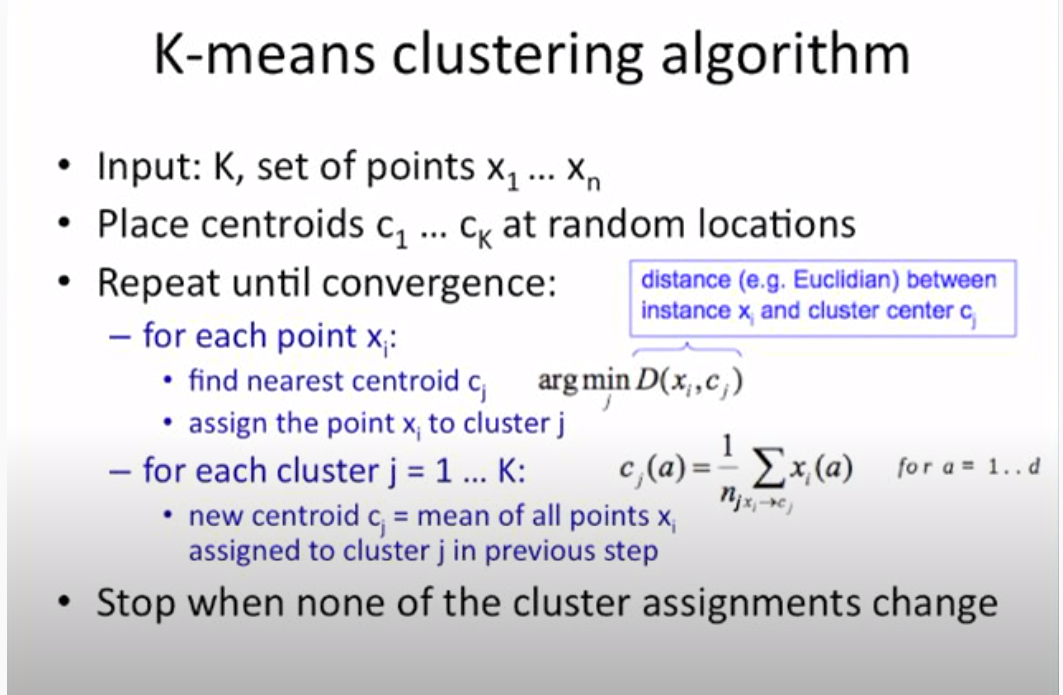
</div>

In [88]:
# Compare to sklearn.cluster.means
from sklearn.cluster import KMeans

In [127]:
# initialize the KMeans 
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# fit 
kmeans.fit(data)
print('--------------------- KMeans result --------------------')
# Kmeans is defined by a few parameters - Inertia + Centers Cluster
print(kmeans.inertia_)
print(kmeans.cluster_centers_)

--------------------- KMeans result --------------------
1779.5862261588059
[[1.02945635 1.06606894]
 [8.07103907 1.02403514]
 [5.0216238  4.89506239]]


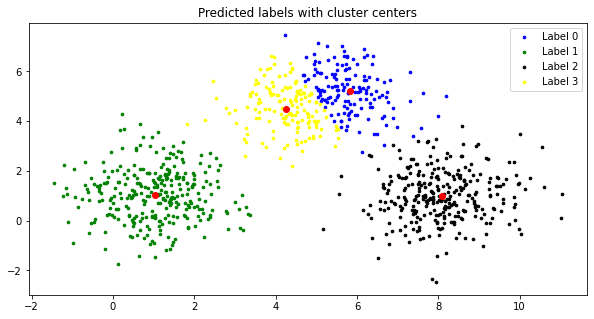

In [96]:
data_df = pd.DataFrame(data, columns=['x','y'])
data_df['label'] = kmeans.labels_
c = ['b', 'g', 'k', 'yellow']
plt.figure(figsize=(10,5))

for i in range(n_clusters):
    data_temp = data_df[data_df['label'] == i]
    plt.scatter(data_temp['x'], data_temp['y'], s=7, c=c[i], label = f'Label {i}')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='r')
plt.legend()
plt.title('Predicted labels with cluster centers')
plt.show()

## Choose the best number of clusters



In [ ]:
# Plot the WCSS according to the number of clusters
# WCSS (.inertia_ in Kmeans) is the sum of the distance of each data with its center

In [97]:
for k in range(3,40,3):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    print(f'--------------------- KMeans result {k} clusters --------------------')
    print(f"WCSS: {kmeans.inertia_}")

--------------------- KMeans result 3 clusters --------------------
WCSS: 1779.5862261588059
--------------------- KMeans result 6 clusters --------------------
WCSS: 1135.1879671343524
--------------------- KMeans result 9 clusters --------------------
WCSS: 778.3205451869127
--------------------- KMeans result 12 clusters --------------------
WCSS: 603.8510744043684
--------------------- KMeans result 15 clusters --------------------
WCSS: 495.57332771081605
--------------------- KMeans result 18 clusters --------------------
WCSS: 421.218579055776
--------------------- KMeans result 21 clusters --------------------
WCSS: 362.6864337099958
--------------------- KMeans result 24 clusters --------------------
WCSS: 316.5248835439634
--------------------- KMeans result 27 clusters --------------------
WCSS: 284.0871223121185
--------------------- KMeans result 30 clusters --------------------
WCSS: 259.88675051237004
--------------------- KMeans result 33 clusters --------------------
W

In [103]:
x_clusters = [x for x in range(3,40,3)]
y_wcss = [KMeans(n_clusters=k, random_state=0).fit(data).inertia_ for k in x_clusters]

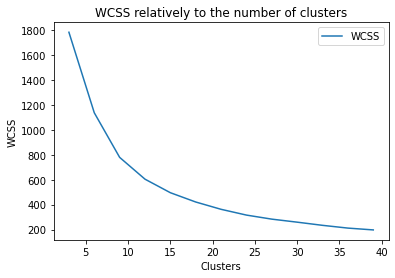

In [106]:
plt.plot(x_clusters, y_wcss, label='WCSS')
plt.title('WCSS relatively to the number of clusters')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.legend()

plt.show()

The best number of clusters would be between 10 and 15 as we "gain" much less information when we increase the number of clusters. There is a trade of between the performance and the complexity of the model. 
Beware, the number of clusters may be decided according to business reasons or the particular problem you want to solve.

__Exercise__
Now let's try to compute ourserlves the WCSS value. Which is the sum of distance between data points and their respective centers. (It's the distance without the sqrt, $distance^2$) 

In [139]:
# First create a function that compute the distance between two points
# See the formula below
# Without using np.linalg

Euclidian distance between two points

$ X_1: (x_1, y_1), X_2: (x_2, y_2) $ 

$ distance = \sqrt((x_2 - x_1)^2 + (y_2 - y_1)^2) $


In [142]:
def distance_2_points(X1,X2):
    """
    input: 
      X1 = array[[x1, y1]]
      X2 = array[[x2, y2]]
    output:
      a float number
    """
    return pow(pow((X2 - X1),2).sum(), 1/2)

X1 = np.array([[1,1]])
X2 = np.array([[5,5]])

distance_2_points(X1,X2).round(2) == 5.66

True

In [12]:
# Now compute the distance between the point (5,5) and all data points
# Hint: Use broadcasting of arrays in numpy and np.sum.

In [21]:
print(f"Before: \n {data[:5]} \n \n After broadcasting [[5,5]]: \n \n {data - [[5,5]]}")

Before: 
 [[ 0.1617298  -0.4917315 ]
 [ 1.00569293  0.10444564]
 [ 1.05930496  1.23895125]
 [ 2.308823    2.3432443 ]
 [ 2.44646892  3.84868075]] 
 
 After broadcasting [[5,5]]: 
 
 [[-4.8382702  -5.4917315 ]
 [-3.99430707 -4.89555436]
 [-3.94069504 -3.76104875]
 ...
 [ 1.482286   -5.33292895]
 [ 2.31333378 -4.77308655]
 [ 2.17392107 -5.36162727]]


In [126]:
# Now I want to compute the distance between data points in form of an array and a center.
def wcss_0(data, center = [[5,5]]):
    return pow(pow((data - center),2).sum(), 1/2)

wcss_0(data)

137.0316337983589

In [143]:
# Now let's try to compute the WCSS parameter for Kmean with 3 clusters
# Kmeans is defined by a few parameters - Inertia + Centers Cluster
print(kmeans.inertia_)

1779.5862261588059


In [146]:
# Now compute the wcss given by the model above.
def wcss(data, label, centers):
    """
    input data: array shape: (900,2)
          label: array shape (900,)
          centers: array shape (3,2)
    output float"""
    
    return sum([pow((data[label == k] - centers[k]),2).sum() for k in range(3)])

In [144]:
centers = kmeans.cluster_centers_
# Those are the labels of each data point according to the KNN model
label = kmeans.labels_

wcss(data, label, centers)

1779.5862261588065